In [83]:
#pip install seaborn


Note: you may need to restart the kernel to use updated packages.


## Setup the environment

In [84]:
import pandas as pd

# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Unsupervised Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Load the Dataset into Pandas

In [85]:
df = pd.read_csv('C:/Users/diego/Documents/Proyectos de datos/Datos/Fraud.csv')

# Display the first few rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [86]:
df.info() # 6362620 rows, 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Explore and clean the data

In [87]:
# Check for missing values in columns
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Correlation matrix
We want to select the Numerical Columns because for the correlation matrix only we can use float variables.

In [88]:
# Select only the numerical columns
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
df_numerical = df[numerical_columns]

<Axes: >

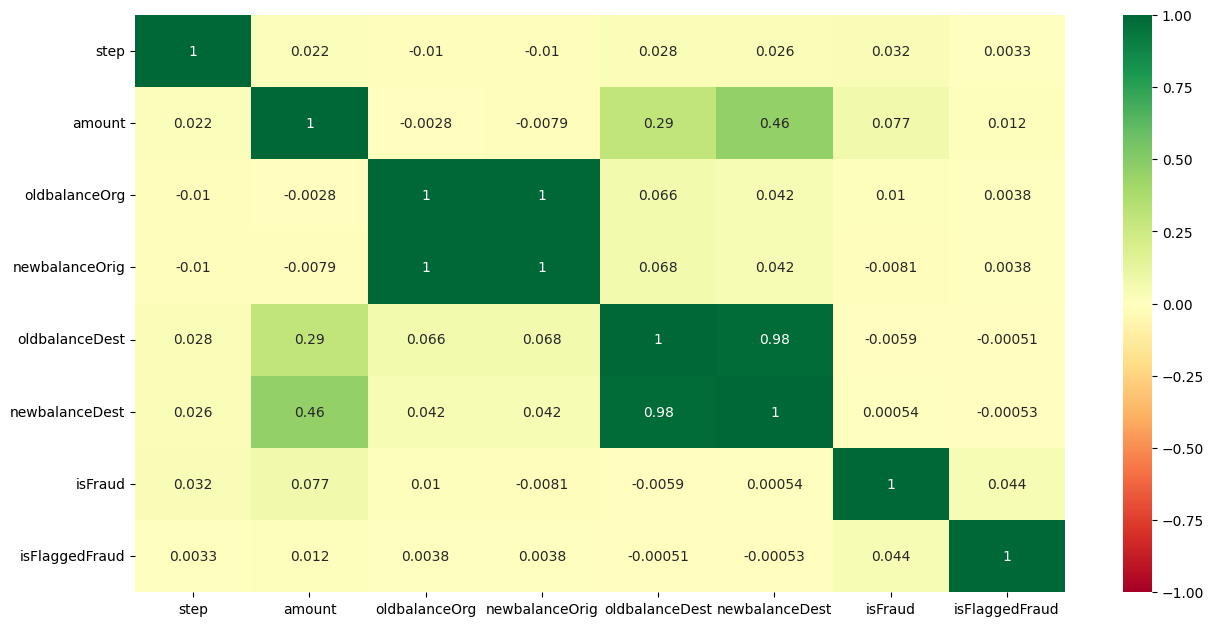

In [89]:
plt.figure(figsize=(15,7.5))
sns.heatmap(df_numerical.corr(), annot=True, vmin=-1, vmax=+1, cmap='RdYlGn')

We can see how it is logical

- High Correlation Between oldbalanceOrg and newbalanceOrig.

- High Correlation Between oldbalanceDest and newbalanceDest.

- Weak Correlation with isFraud:

The correlations between isFraud and other numerical variables are generally weak: The highest correlation with isFraud is 0.077 with amount, suggesting a very weak relationship between transaction amounts and fraudulent behavior. Other features like oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest have correlations near zero, indicating little to no linear relationship with fraud.

This means that none of the features in their current form have a strong linear correlation with whether a transaction is fraudulent. However, this doesn't necessarily mean they aren't useful for predicting fraud — non-linear relationships might exist that can still be captured by machine learning models.

Weak Correlation with Fraud: The weak correlations with isFraud suggest that there might be more complex, non-linear relationships in the data that a simple correlation matrix can't capture. We'll likely need more advanced machine learning techniques to detect fraud effectively.

Balance Features: Since the old and new balances are highly correlated, we might consider focusing on derived features like the difference between old and new balances for both origin and destination accounts. Feature Engineering is Key, we should consider creating new features like: Balance change features (oldbalance - newbalance).

## Exploratory data analysis (EDA)

### Basic Descriptive Statistics

In [90]:
# Basic statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


### Distribution of Fraudulent vs Non-Fraudulent Transactions

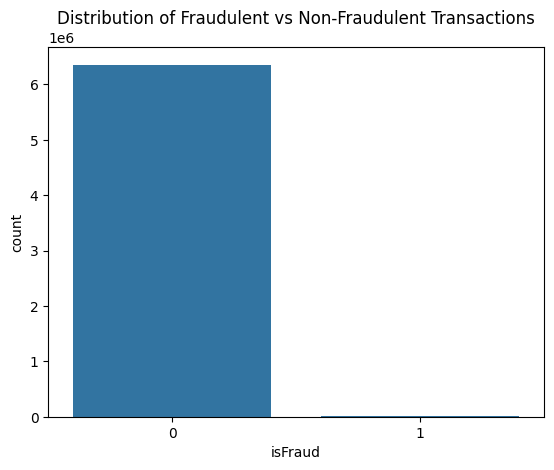

In [91]:
# Countplot for isFraud
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

### Fraudulent transactions for each transaction type.

In [92]:
# Number of fraudulent transactions by type
fraudulent_transactions_type = df[df['isFraud'] == 1].groupby('type')['isFraud'].count()
print(fraudulent_transactions_type)


type
CASH_OUT    4116
TRANSFER    4097
Name: isFraud, dtype: int64


In [93]:
# Display the first 15 fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]
print(fraudulent_transactions.head(15))

      step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2        1  TRANSFER     181.00  C1305486145         181.00            0.00   
3        1  CASH_OUT     181.00   C840083671         181.00            0.00   
251      1  TRANSFER    2806.00  C1420196421        2806.00            0.00   
252      1  CASH_OUT    2806.00  C2101527076        2806.00            0.00   
680      1  TRANSFER   20128.00   C137533655       20128.00            0.00   
681      1  CASH_OUT   20128.00  C1118430673       20128.00            0.00   
724      1  CASH_OUT  416001.33   C749981943           0.00            0.00   
969      1  TRANSFER 1277212.77  C1334405552     1277212.77            0.00   
970      1  CASH_OUT 1277212.77   C467632528     1277212.77            0.00   
1115     1  TRANSFER   35063.63  C1364127192       35063.63            0.00   
1116     1  CASH_OUT   35063.63  C1635772897       35063.63            0.00   
1869     1  TRANSFER   25071.46   C669700766       2

We can observe that there are transaction when the balance in the origin account is zero and the new balance in the destination account stay zero after the money transfer.  How that is possible?

This seems like an anomaly and a potential sign of fraudulent behavior or poor data integrity. In a normal system, you shouldn’t be able to transfer money if the balance in the origin account is zero. This could indicate:
- The transaction bypasses proper checks (in the case of a bug or vulnerability).
- The dataset itself may have some synthetic data or issues.
- A failed transaction.
- A possible fraudulent transaction that was never reflected in the destination account.
  
We should flag such cases where the transaction amount is positive, but the old balance of the origin account (oldbalanceOrg) is zero.

In [94]:

filtered_df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
total_transactions = filtered_df.groupby('type')['isFraud'].count()

# Calculate the proportion of fraudulent transactions for the transaction types of TRANSFER and CASH_OUT
fraud_proportion = fraudulent_transactions_type / total_transactions
print(fraud_proportion)

type
CASH_OUT   0.00
TRANSFER   0.01
Name: isFraud, dtype: float64


The proportion of fraudulent transactions is much less than 1%, so the data is imbalanced.

We should handle this imbalance before applying machine learning models. Some techniques to handle imbalanced data include:
- Resampling (oversampling the minority class or undersampling the majority class).
- Using class weights in certain machine learning algorithms to give more importance to the minority class (fraudulent transactions).
- Anomaly detection models might also be appropriate given the rare nature of fraudulent events.

### Top 10 maximum amounts of transactions

In [95]:
# Sort the dataset by the 'amount' column in descending order and select the top 10 rows
top_10_transactions = df.sort_values(by='amount', ascending=False).head(10)
print(top_10_transactions)

         step      type      amount     nameOrig  oldbalanceOrg  \
3686583   276  TRANSFER 92445516.64  C1715283297           0.00   
4060598   300  TRANSFER 73823490.36  C2127282686           0.00   
4146397   303  TRANSFER 71172480.42  C2044643633           0.00   
3946920   286  TRANSFER 69886731.30  C1425667947           0.00   
3911956   284  TRANSFER 69337316.27  C1584456031           0.00   
3937152   286  TRANSFER 67500761.29   C811810230           0.00   
4105338   302  TRANSFER 66761272.21   C420748282           0.00   
3892529   284  TRANSFER 64234448.19  C1139847449           0.00   
3991638   298  TRANSFER 63847992.58   C300140823           0.00   
4143801   303  TRANSFER 63294839.63   C372535854           0.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3686583            0.00   C439737079         9595.98     92455112.62        0   
4060598            0.00   C753026640     93624010.19    167447500.55        0   
4146397            

## Prepare the data

We can improve the modelling data by adding new features, filtering unnecessary transaction types, and increasing the proportion of the target variable isFraud by applying undersampling.

Based on our findings from the analysis phase, we only need to analyse the transaction types "TRANSFER" and "CASH_OUT" and filter the rest. We can also compute new variables from the existing amount values.

The dataset contains an extremely unbalanced target for fraud (fraud rate in the raw data = 0.0013%). Having rare events is common for fraud. In order to make the pattern of fraudulent behaviour more obvious for the machine learning algorithms, and also make it easy to interpret the results, stratify the data and increase the proportion of the fraudulent flags.

One of the key challenges in machine learning is dealing with categorical variables—features that represent categories rather than continuous values. In our dataset, the type variable (e.g., TRANSFER, CASH_OUT) is a good example of this. Since ML methods expects numerical input, we need to transform these categorical variables into a format that the model can understand.

To do this, we will use a technique called one-hot encoding. One-hot encoding converts each unique category into a separate binary feature (0 or 1), allowing the model to treat these categories independently. Fortunately, this transformation can be done automatically in many environments, which will handle the one-hot encoding for us.

Steps:

    1 Filter by transaction types ("CASH_OUT" and "TRANSFER") and One-Hot encode the categorical variable. 
    
    2 Add new features (origzeroFlag, destzeroFlag, amountError, and a unique id for each transaction).

    3 One-hot encode the 'type' column

    4 Undersample non-fraudulent transactions (take 10% of non-fraud transactions).

In [106]:
import uuid

# Filter
filtered_df = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]

# Add new features
filtered_df['origzeroFlag'] = np.where(filtered_df['oldbalanceOrg'] == 0.0, 1, 0)
filtered_df['destzeroFlag'] = np.where(filtered_df['newbalanceDest'] == 0.0, 1, 0)
filtered_df['amountError'] = round(filtered_df['newbalanceDest'] - filtered_df['oldbalanceDest'] - filtered_df['amount'])

# One-hot encode the 'type' column (for example, 'TRANSFER' and 'CASH_OUT')
filtered_df = pd.get_dummies(filtered_df, columns=['type'], drop_first=False)

# Create a unique id for each transaction
filtered_df['id'] = [str(uuid.uuid4()) for _ in range(len(filtered_df))]

# Undersample: select all fraudulent transactions and 10% of non-fraudulent ones
fraud_df = filtered_df[filtered_df['isFraud'] == 1]  # All fraudulent cases
non_fraud_df = filtered_df[filtered_df['isFraud'] == 0].sample(frac=0.10, random_state=42)  # 10% of non-fraudulent cases

# Combine both fraud and undersampled non-fraud data
undersampled_df = pd.concat([fraud_df, non_fraud_df])

print(undersampled_df.head()) 


C:\Users\diego\AppData\Local\Temp\ipykernel_13300\369651635.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['origzeroFlag'] = np.where(filtered_df['oldbalanceOrg'] == 0.0, 1, 0)
C:\Users\diego\AppData\Local\Temp\ipykernel_13300\369651635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['destzeroFlag'] = np.where(filtered_df['newbalanceDest'] == 0.0, 1, 0)
C:\Users\diego\AppData\Local\Temp\ipykernel_13300\369651635.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

     step   amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
2       1   181.00  C1305486145         181.00            0.00   C553264065   
3       1   181.00   C840083671         181.00            0.00    C38997010   
251     1  2806.00  C1420196421        2806.00            0.00   C972765878   
252     1  2806.00  C2101527076        2806.00            0.00  C1007251739   
680     1 20128.00   C137533655       20128.00            0.00  C1848415041   

     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  origzeroFlag  \
2              0.00            0.00        1               0             0   
3          21182.00            0.00        1               0             0   
251            0.00            0.00        1               0             0   
252        26202.00            0.00        1               0             0   
680            0.00            0.00        1               0             0   

     destzeroFlag  amountError  type_CASH_OUT  type_TRAN

We will create now a TEST dataset by selecting a random sample of 20% for scoring the model at the final stage. 
This data will be kept separate and not be included in training.

In [107]:
# Take a random sample of 20% from undersampled_df for the test set
test_data = undersampled_df.sample(frac=0.20, random_state=42)

# Display the shape of the test data to verify
print("Test data shape:", test_data.shape)

Test data shape: (56887, 16)


We will create a model data table with the remaining 80%

In [108]:
# Create the model data by excluding the test data from undersampled_df
model_data = undersampled_df.drop(test_data.index)

# Display the shape of the model data to verify
print("Model data shape:", model_data.shape)

Model data shape: (227546, 16)


The sample data that we created for modelling contains approximately 228k rows of banking transactions.

## Train an unsupervised model to detect anomalies

Unsupervised methods are commonly used in fraud detection to explore the abnormal behaviour in the data. It also helps when there are no labels for fraud or the event rate is very low and the number of occurrences does not allow you to build a supervised model.

In this section, we will use *k-means clustering algorithm* to create segments of transactions, analyse each segment and detect the ones with anomalies.


### 1. Train the K-Means Model on the model_data:

In [99]:
# Step 1: Select the relevant columns for clustering
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'origzeroFlag', 'destzeroFlag', 'amountError', 'type_CASH_OUT', 'type_TRANSFER']

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
scaled_model_data = scaler.fit_transform(model_data[features])

# Step 3: Train the K-Means model
# Choose a number of clusters, for example 5
kmeans = KMeans(n_clusters=5, random_state=42)
model_data['centroid_id'] = kmeans.fit_predict(scaled_model_data)

# Step 4: Check the assigned clusters (centroid_id)
print(model_data[['centroid_id']].head())

     centroid_id
3              0
251            4
252            0
680            4
681            0


### 2. Score the test_data:

Next, we will use the trained K-Means model to predict the centroid_id for each transaction in the test_data (20% of the dataset).

In [100]:
# Scale the test data using the same scaler that was used for the training data
scaled_test_data = scaler.transform(test_data[clustering_features])

# Predict the centroid_id (cluster) for each transaction in the test data
test_data['centroid_id'] = kmeans.predict(scaled_test_data)

# Display the first few rows to verify
print(test_data[features].head())


           amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
925051  377428.19           0.00            0.00       709039.64   
4343135 220898.60           0.00            0.00       979278.26   
5955076  47730.79           0.00            0.00      1102332.42   
2473624 560191.64           0.00            0.00       809366.77   
408111   94627.56       32528.46            0.00      1460597.18   

         newbalanceDest  origzeroFlag  destzeroFlag  amountError  \
925051       1086467.83             1             0         0.00   
4343135      1200176.86             1             0         0.00   
5955076      1150063.21             1             0         0.00   
2473624      1369558.41             1             0        -0.00   
408111       1555224.75             0             0         0.00   

         type_CASH_OUT  type_TRANSFER  
925051            True          False  
4343135           True          False  
5955076           True          False  
2473624          False

### 3. Analyze the Distribution of Fraudulent Transactions in Each Cluster:

In [101]:
# Group the test data by 'centroid_id' and calculate the number of fraudulent transactions in each cluster
fraud_distribution = test_data.groupby('centroid_id')['isFraud'].sum()

# Also, calculate the total number of transactions in each cluster
total_transactions = test_data.groupby('centroid_id')['isFraud'].count()

# Calculate the percentage of fraudulent transactions in each cluster
fraud_percentage = (fraud_distribution / total_transactions) * 100

# Display the results
fraud_stats = pd.DataFrame({
    'Total Transactions': total_transactions,
    'Fraudulent Transactions': fraud_distribution,
    'Fraud Percentage (%)': fraud_percentage
})

print(fraud_stats)


             Total Transactions  Fraudulent Transactions  Fraud Percentage (%)
centroid_id                                                                   
0                         24895                      782                  3.14
1                           121                        1                  0.83
2                            18                       17                 94.44
3                         20643                        5                  0.02
4                         11210                      825                  7.36


### 4. Visualize the Distribution of Fraudulent Transactions in Each Cluster:

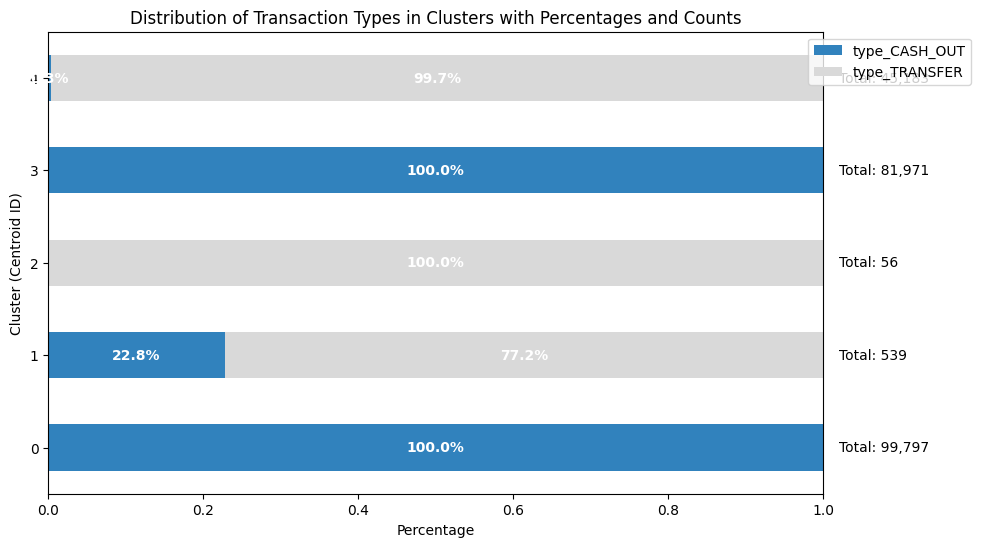

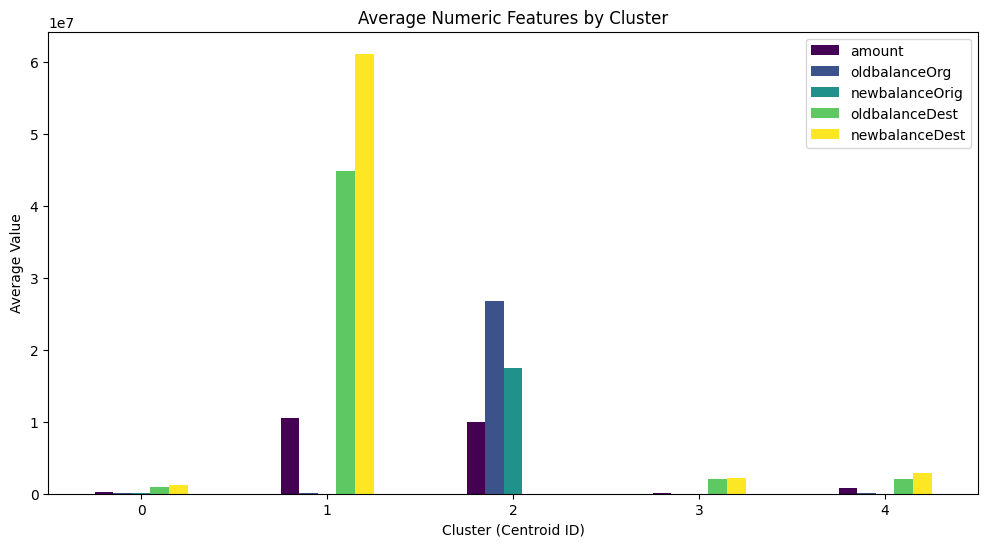

In [102]:
# Step 1: Group by 'centroid_id' (cluster) and sum all the encoded types (TRANSFER, CASH_OUT, etc.)
type_columns = [col for col in model_data.columns if col.startswith('type_')]
type_distribution = model_data.groupby('centroid_id')[type_columns].sum()

# Step 2: Normalize the distribution to get the percentages (for stacking purposes)
type_distribution_percent = type_distribution.div(type_distribution.sum(axis=1), axis=0)

# Step 3: Plot the stacked bar chart with percentages for transaction types in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
type_distribution_percent.plot(kind='barh', stacked=True, ax=ax, colormap='tab20c')

# Step 4: Add actual transaction type counts and percentage labels inside the bars
for i in range(type_distribution.shape[0]):
    # Iterate over each type column to add percentage labels inside the bars
    cum_width = 0  # cumulative width of each stacked bar segment
    for j, col in enumerate(type_columns):
        width = type_distribution_percent.iloc[i, j]
        if width > 0:  # Only add labels if the width is non-zero
            ax.text(cum_width + width / 2, i, f"{width * 100:.1f}%", va='center', ha='center', color="white", fontweight="bold")
            cum_width += width
    
    # Display raw counts on the right-hand side of the bars
    ax.text(1.02, i, f"Total: {int(type_distribution.iloc[i].sum()):,}", va='center', ha='left')

# Step 5: Customize the chart
plt.title('Distribution of Transaction Types in Clusters with Percentages and Counts')
plt.xlabel('Percentage')
plt.ylabel('Cluster (Centroid ID)')
plt.legend(type_columns, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlim(0, 1)  # Keep the x-axis scaled to percentage
plt.show()

# Step 6: Add additional cluster-level numeric analysis (like average transaction amounts)
cluster_numeric_averages = model_data.groupby('centroid_id')[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].mean()

# Plot the average numeric feature values per cluster
cluster_numeric_averages.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Numeric Features by Cluster')
plt.xlabel('Cluster (Centroid ID)')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()



### 5. Evaluate Cluster Homogeneity:

These following two metrics give us a sense of how well our K-Means clustering model has performed. If we are looking to improve, we can experiment with different numbers of clusters, feature scaling, or more advanced clustering methods.

#### 1. Davies-Bouldin Index (DBI):

The Davies-Bouldin Index is a measure of cluster separation and cohesion. It evaluates how well the clusters are separated from each other and how tightly packed (cohesive) the points within each cluster are.

The DBI provides an indication of cluster quality by looking at both the distance between clusters and how tight the points are within clusters. A lower DBI value generally means that the clusters are well-defined, with clear separations between them.

In [103]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin index for the training data
db_index = davies_bouldin_score(scaled_training_data, model_data['centroid_id'])

print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.9198057830606949


#### 2. Mean Squared Distance (MSD):

The Mean Squared Distance refers to the average squared distance between each data point and the centroid of its assigned cluster. This metric essentially tells you how well the points are fitting within their assigned clusters.

The MSD provides insight into how tightly clustered the points are around the centroid of their cluster. The lower the MSD, the more compact the clusters, which generally indicates a good clustering solution.

In [105]:
# Step 1: Get the cluster centers from the trained K-Means model
centroids = kmeans.cluster_centers_

# Step 2: For each data point, calculate the squared distance to its assigned centroid
# We already have 'scaled_model_data' and 'model_data['centroid_id']' (the cluster assignments)

# Initialize an empty list to store the squared distances
squared_distances = []

for i, point in enumerate(scaled_model_data):
    # Get the centroid for the current point's assigned cluster
    centroid = centroids[model_data['centroid_id'].iloc[i]]
    
    # Calculate the squared distance between the point and its centroid
    squared_distance = np.sum((point - centroid) ** 2)
    
    # Append the squared distance to the list
    squared_distances.append(squared_distance)

# Step 3: Calculate the mean of the squared distances (Mean Squared Distance)
mean_squared_distance = np.mean(squared_distances)

# Display the result
print(f"Mean Squared Distance (MSD): {mean_squared_distance}")

Mean Squared Distance (MSD): 4.827167633193988


Typically, in fraud detection, the most interesting clusters tend to be those that exhibit unusual behaviors and are small with high errors amount, such as:

- High concentration of fraudulent transactions (if we include isFraud in the analysis).
- Transactions with large discrepancies between oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest, which might indicate potential fraudulent activity.
- Clusters with anomalies in transaction amounts (amountError).
- Unusual flags like origzeroFlag and destzeroFlag being consistently raised.

### Summary:

- We trained a K-Means clustering model on model_data (80% training data).
- We scored the test_data (20% test data) to assign each transaction to a cluster.
- We analyzed the distribution of fraudulent transactions within each cluster and visualized it with bar plots.
- Finally, we evaluated the clustering quality using the Davies-Bouldin Index.

The target variable isFraud hasn't been used in this unsupervised model. It is preferred to save that variable for profiling and use it to explore the distribution of fraudulent activities within each cluster.

## Train a supervised machine learning model

Now that we have explored unsupervised learning techniques like K-Means clustering, it's time to take the next step and build a supervised machine learning model. Supervised learning involves training a model on labeled data—in our case, we want to predict whether a transaction is fraudulent or non-fraudulent. For this task, we will start with a simple algorithm: binary logistic regression.

Why **Logistic Regression**?

Logistic regression is one of the most straightforward yet effective methods for classification problems, where the goal is to predict one of two possible outcomes (fraudulent or not). It's particularly useful when we're trying to model the probability of a binary outcome based on multiple input features. In our case, these features include transaction amounts, balances, and transaction types, which will help the model learn to distinguish between normal and fraudulent activities.

This simple regression model will provide a strong foundation for understanding how we can leverage machine learning to identify fraudulent transactions, and it will serve as a starting point for more complex models in the future.